# Exercise 1

**read the sensor file and plot the temperature, humidy and pressure as a function of the unix time and in the format yy/mm/dd - hh:mm:ss**

References: see the notebooks, readfile, timestamp and tgraph


In [10]:
from datetime import datetime
from pytz import timezone
from pytz import utc
from ROOT import TCanvas, TGraph
from array import array


In [11]:
tz = "Europe/Berlin"
local = timezone (tz)

## DATA 

In [12]:
doc = open("bme680.dat", "r")

In [13]:
doc.seek(0,0)
data = doc.read().splitlines()

In [14]:
doc.close()

In [15]:
for line in data:
    column = line.split()

In [16]:
timestamp = array('d')
temp = array('d')

In [17]:
for line in data:
    column = line.split()
    date = column[0]
    time = column[1]
    temp.append(float(column[2]))
    hum = column [3]
    pr = column [4]
    
    year = int(date.split('-')[0])
    month = int(date.split('-')[1])
    day = int(date.split('-')[2])
  
    hour  = int(time.split(':')[0])
    minutes  = int(time.split(':')[1])
    seconds  = int(float(time.split(':')[2]))
    
    local_datetime = local.localize(datetime(year, month, day, hour, minutes, seconds))
    utc_datetime = local_datetime.astimezone(utc)
    timestamp.append(utc_datetime.replace(tzinfo=utc).timestamp())

In [20]:
n = len(timestamp)

## TIME 

In [53]:
C1 = TCanvas('canvas', 'Temperature, 200, 10, 1000, 700)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


In [54]:
x,y = array('d'), array('d')

In [55]:
gr = TGraph(n, timestamp, temp)

In [59]:
gr.GetXaxis().SetTimeDisplay(1)
gr.GetXaxis().SetTimeFormat("%Y/%m/%d %H:%M:%S %F1970-01-01 00:00:00");
gr.GetXaxis().SetNdivisions(405)

In [60]:
gr.SetLineWidth(2)
gr.SetLineColor(4)
gr.SetTitle("Temperature Graph")
gr.GetXaxis().SetTitle("Timestamp")
gr.GetYaxis().SetTitle("Temperature")

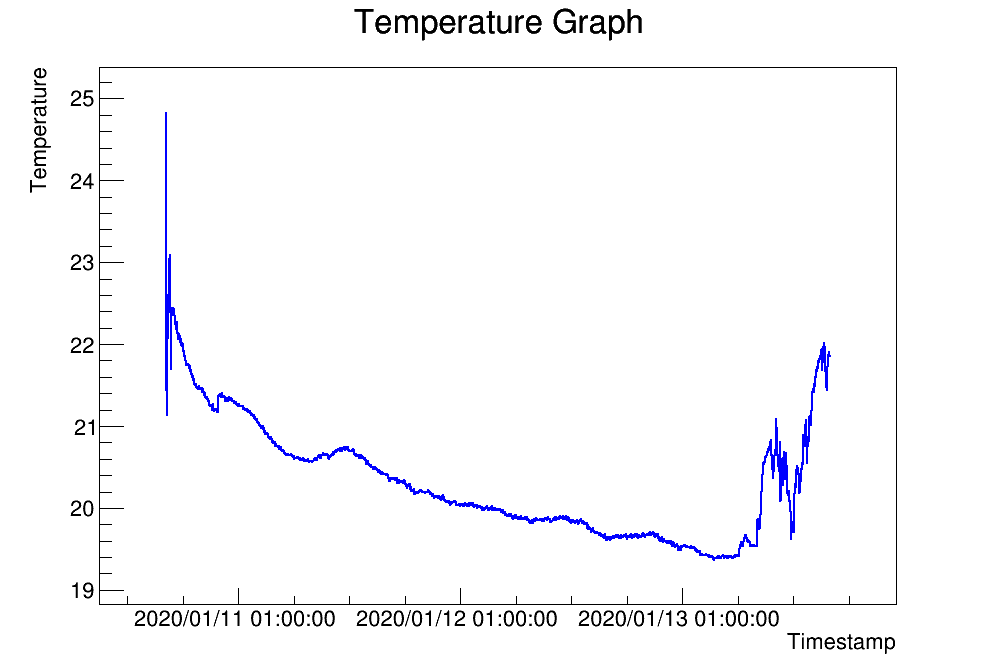

In [61]:
C1.Draw()
gr.Draw( 'AC' )